# Sensitivity analysis for Bayesian networks using credal networks

<table><tr><td>
    <a href="http://agrum.org" target="blank"><img src="images/logoAgrum.png"/></a>
    </td><td>
    <a href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" src="images/cc4.png" /></a>
    <br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.
</td></tr></table>

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn=gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn,gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

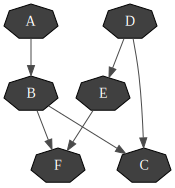

In [3]:
cr=gum.CredalNet(bn,bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(beta=1e-10,oneNet=False)
cr.computeBinaryCPTMinMax()
print(cr)


A:Range([0,1])
<> : [[0.182055 , 0.817945] , [0.132709 , 0.867291]]

B:Range([0,1])
<A:0> : [[0.814242 , 0.185758] , [0.814241 , 0.185759]]
<A:1> : [[0.360802 , 0.639198] , [0.359964 , 0.640036]]

C:Range([0,1])
<B:0|D:0> : [[0.187328 , 0.812672] , [0.15419 , 0.84581]]
<B:1|D:0> : [[0.507362 , 0.492638] , [0.507283 , 0.492717]]
<B:0|D:1> : [[0.425391 , 0.574609] , [0.425104 , 0.574896]]
<B:1|D:1> : [[0.184355 , 0.815645] , [0.112276 , 0.887724]]

D:Range([0,1])
<> : [[0.984151 , 0.0158492]]

E:Range([0,1])
<D:0> : [[0.18389 , 0.81611] , [0.143465 , 0.856535]]
<D:1> : [[0.635584 , 0.364416] , [0.635572 , 0.364428]]

F:Range([0,1])
<E:0|B:0> : [[0.688333 , 0.311667] , [0.688327 , 0.311673]]
<E:1|B:0> : [[0.242911 , 0.757089] , [0.235478 , 0.764522]]
<E:0|B:1> : [[0.350608 , 0.649392] , [0.34961 , 0.65039]]
<E:1|B:1> : [[0.529391 , 0.470609] , [0.529335 , 0.470665]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [5]:
def showNoisy(bn,beta):
  cr=gum.CredalNet(bn,bn)
  cr.bnToCredal(beta=beta,oneNet=False)
  cr.computeBinaryCPTMinMax()
  ielbp=gum.CNLoopyPropagation(cr)  
  return gnb.getInference(cr,engine=ielbp)

In [6]:
for eps in [1,1e-3,1e-5,1e-8,1e-10]:
  gnb.flow.add(showNoisy(bn,eps),caption=f"noise={eps}")
gnb.flow.display()